<div style="text-align: center"> <h1>한국과 미국의 경제 동향 비교</h1>  </div>

## INDEX
---

1. [데이터 설명 및 보기](#1.-데이터-설명-및-보기)
    1. [데이터 준비배경](#A.-데이터-준비배경)
    1. [데이터 불러오기](#B.-데이터-불러오기)

1. [데이터 기초 분석 탐색](#2.-데이터-기초-분석-탐색)

1. [데이터 클린징](#3.-데이터-클린징)
    1. [데이터 범위 지정](#A.-데이터-범위-지정)
    1. [결측데이터 확인](#B.-결측데이터-확인)
    1. [이상데이터 확인](#C.-이상데이터-확인)
    1. [중복데이터 확인](#D.-중복데이터-확인)

1. [데이터 시각화](#4.-데이터-시각화)
    1. [lineplot를 통한 시간에 따른 지수 단순확인](#A.-lineplot를-통한-시간에-따른-지수-단순확인)
    1. [코스피지수와 다우지수의 전일대비 변등폭 차이 분석](#B.-코스피지수와-다우지수의-전일대비-변등폭-차이-분석)
    1. [코스피지수와 원 달러 환율 분석](#C.-코스피지수와-원-달러-환율-분석)

1. [통계 및 머신러닝](#5.-통계-및-머신러닝)
    1. [상관분석](#상관분석)
    1. [회귀분석](#회귀분석)
    1. [LSTM](#LSTM)

1. [결론 및 본인 차별화 포인트](#6.-결론-및-본인-차별화-포인트)

1. [Reference](#7.-Reference)

각 목차별 클릭으로 이동하실 수 있습니다.  

## 1. 데이터 설명 및 보기
---

### A. 데이터 준비배경
---

현재 우리나라의 경제는 COVID-19 바이러스로 인해 민간 소비와 수출이 큰 폭으로 위축되며 0.2% 성장한 후,  
2021년 양호한 회복세를 나타낼 전망이다. 경기 위축과 유가 하락 등이 겹치면서 물가 상승률 또한 낮게  
유지 될 것으로 전망된다.  

한국의 대미 수출 상품 구조가 저가의 공산품에서 자동차, IT제품 등 고가의 내구제 중심으로  
변화됨에 따라 한국의 대미 수출 증가율이 이전에 비해 미국경기와 더욱 밀접한 관계를 맺게 되었다.  
또한 2000년 이후 한국 금융시작의 대외 개방이 가속화됨에 따라 국내 자본 시작의 외국인 투자  
비중과 영향력 역시 증가되는 추세이다.

따라서 한국증시(Kospi), 미국증시(DJI), 원달러 환율을 통해 한국과 미국의 경제 동향에 대한 비교를 진행한다.

### 기존 데이터 사용사례
- Prophet Korean won_US dollar exchange rate(kaggle) : sklearn 모델 API를 통한 이후 원달러 환율 변화 예측
- Starter: Stock prices Dow Jones 2ecf2367-4(kaggle): 각 주식회사의 과거 데이터의 시각화
- preprocessing_analysis(kaggle): 각 주식회사의 다양한 데이터 시각화 방법
- pca_example(kaggle): sklearn 모델을 통한 예측 모델 작성

### B. 데이터 불러오기
---

In [2]:
# 필요한 모듈 import
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
import os
import pandas as pd

plt.rcParams['font.family'] = 'NanumGothic'
# 외부데이터를 불러와 변수 df에 저장한다.
file_kospi = 'C:/data/kospi.csv'           # 코스피
file_dji = 'C:/data/djia.csv'              # 다우지수
file_wondollar = 'C:/data/DEXKOUS.csv'     # 원달러 환율
df_kospi = pd.read_csv(file_kospi)
df_dji = pd.read_csv(file_dji)
df_wondollar = pd.read_csv(file_wondollar)

## 2. 데이터 기초 분석 탐색
---

### 전체 데이터 확인

In [3]:
df_kospi
df_dji
df_wondollar

,DATE,DEXKOUS
0,2000-02-01,1127.00
1,2000-02-02,1131.00
2,2000-02-03,1130.50
3,2000-02-04,1130.00
4,2000-02-07,1129.60
...,...,...
4579,2017-08-21,1137.1400
4580,2017-08-22,1131.7900
4581,2017-08-23,1128.5900
4582,2017-08-24,1127.8000


### 데이터프레임의 기본정보 확인

In [4]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4938 non-null   object 
 1   Open       4938 non-null   float64
 2   High       4938 non-null   float64
 3   Low        4938 non-null   float64
 4   Close      4938 non-null   float64
 5   Adj Close  4938 non-null   float64
 6   Volume     4938 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.2+ KB


In [5]:
df_dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    885 non-null    object 
 1   Open    885 non-null    float64
 2   High    885 non-null    float64
 3   Low     885 non-null    float64
 4   Close   885 non-null    float64
 5   Volume  885 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 41.6+ KB


In [6]:
df_wondollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     4584 non-null   object
 1   DEXKOUS  4584 non-null   object
dtypes: object(2)
memory usage: 71.8+ KB


## 데이터프레임의 자료형을 형변환후 병합
#### serial data : Date  
#### values : kospi.Close, dji.DJIA, wondallor.DEXKOUS  
Date는 object 형이므로 pandas에서 사용하기 위한 Datetime형으로 변환한다.  
value는 코스피 당일 종가, dji 당일종가, wondollar 당일 종가 로 하여 float64형으로 변환한다.

In [7]:
# Date 가 object 형식이므로 datetime 형식으로 변경
df_kospi['New_Date'] = pd.to_datetime(df_kospi['Date'])
df_dji['New_Date'] = pd.to_datetime(df_dji['Date'])
df_wondollar['New_Date'] = pd.to_datetime(df_wondollar['DATE'])

In [8]:
# wondollar의 DEXKOUS가 object 형이기 때문에 float64 형으로 변환한다.
# 이때 DEXKOUS에 float로 바꿀 수 없는 '.'이 있어 None으로 변형하여 수행한다.
df_wondollar['New_DEXKOUS'] = np.where(df_wondollar['DEXKOUS'] == '.', None, df_wondollar['DEXKOUS'])
df_wondollar['DEXKOUS_float'] = df_wondollar['New_DEXKOUS'].astype('float64')

#### 3가지 dataframe에 대해 new_Date가 key값이므로 이에 따라 outer join을 통해 병합한다.

In [9]:
df_temp = pd.merge(df_kospi, df_dji, left_on = 'New_Date', right_on = 'New_Date', how = 'outer')
df_joindata =  pd.merge(df_temp, df_wondollar, left_on = 'New_Date', right_on = 'New_Date', how = 'outer')
df_joindata

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close,Volume_x,New_Date,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,DATE,DEXKOUS,New_DEXKOUS,DEXKOUS_float
0,1997-07-01,744.979980,760.520020,744.669983,758.030029,758.030029,0.0,1997-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-02,763.390015,777.289978,763.390015,777.289978,777.289978,0.0,1997-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-07-03,778.820007,782.169983,773.270020,775.260010,775.260010,0.0,1997-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-07-04,776.020020,783.239990,773.900024,781.700012,781.700012,0.0,1997-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-07-07,781.500000,783.109985,772.140015,773.510010,773.510010,0.0,1997-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-21,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-21,1137.1400,1137.1400,1137.14
5218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-22,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-22,1131.7900,1131.7900,1131.79
5219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-23,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-23,1128.5900,1128.5900,1128.59
5220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-24,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-24,1127.8000,1127.8000,1127.80


## 3. 데이터 클린징
---

### A. 데이터 범위 지정

2번 데이터 기초 분석 탐색 과정을 통해 총 3개의 데이터에 대해 알아보았고,  
한개의 데이터 프레임으로 merge(outer join)했다. 이렇게 merge된 df_joindata는 범위가 너무 커 바로 사용하지 못한다.  
따라서 범위를 New_Date 기준으로 2014-01-02 ~ 2017-07-07로 3년 반간의 데이터로 범위를 지정해 클린징을 한다.

In [10]:
temp = df_joindata.loc[4077:4937, ['New_Date', 'Close_x','Close_y', 'DEXKOUS_float']]
temp = temp.reset_index(drop=True)
df_data = pd.DataFrame( columns=['날짜', '코스피','다우지수','원달러'])
df_data['날짜'] = temp['New_Date']
df_data['코스피'] = temp['Close_x']
df_data['다우지수'] = temp['Close_y']
df_data['원달러'] = temp['DEXKOUS_float']
df_data

,날짜,코스피,다우지수,원달러
0,2014-01-02,1967.189941,16441.35,1050.30
1,2014-01-03,1946.140015,16469.99,1055.00
2,2014-01-06,1953.280029,16425.10,1065.01
3,2014-01-07,1959.439941,16530.94,1068.50
4,2014-01-08,1958.959961,16462.74,1065.45
...,...,...,...,...
856,2017-06-28,2382.560059,21454.61,1141.91
857,2017-06-29,2395.659912,21287.03,1144.07
858,2017-07-03,2394.479980,21479.27,1149.26
859,2017-07-04,2380.520020,NaN,NaN


### B. 결측데이터 확인

**- 결측치 확인**  

In [11]:
df_data.isnull().sum()

날짜       0
코스피      0
다우지수    26
원달러     30
dtype: int64

isnull().sum() 함수를 사용하여 범위를 지정한 df_data의 결측 데이터를 확인 결과 다우지수, 원달러 부분에서 결측지가  
있는 것을 확인 가능하다. 

**- 결측치 대체/제거**  
결측치 중 다우지수와 원달러의 경우 공휴일로 인해 결측치가 발생할 수 있다.   
따라서 결측치를 제거하는 것이 아닌 대체를 통해 결측치를 처리한다. 
공휴일 같은경우 이전 날짜의 데이터가 기존 유지 되므로 이전 행의 값으로 채우도록 결측치를 처리한다.

In [12]:
df_data = df_data.fillna(method = 'ffill')

**- 결측치 반영 확인**

In [13]:
df_data.isnull().sum()

날짜      0
코스피     0
다우지수    0
원달러     0
dtype: int64

### C. 이상데이터 확인

이상데이터 확인은 정상에서 벗어난 데이터, 이상치(Outlier)가 있는지 확인하는 단계이다.  
확인할 이상데이터가 연송혁 데이터이므로 boxplot을 통해 이상치를 확인한다.

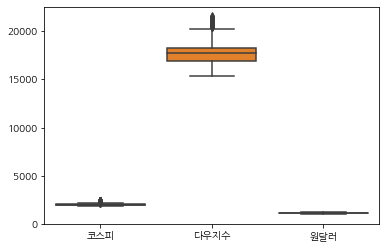

In [14]:
temp = df_data.loc[:,['코스피','다우지수','원달러']]
sns.boxplot(data = temp)

연속형 범수인 코스피, 다우지수, 원달러를 boxplot을 통해 이상치를 확인해 본 결과  
특이한 이상치가 없는것을 확인했으므로 이상치 제거를 넘어간다.

### D. 중복데이터 확인

유일한 키(Key)값을 관리해야 하는 경우 중복(Duplicates)데이터가 발생하면 분석에 영향을 미칠 수 있다. 
  
df_data의 경우 날짜가 Key값이 되므로 날짜에 대한 중복데이터 검사를 진행한다.  
나머지 열은 연속형 변수로 중복검사 할 필요 없다.

In [15]:
df_data.duplicated(['날짜']).sum()

0

duplicated().sum() 함수를 통해 중복을 검사한 결과 Key 값인 날짜에서 중복이 없음을 확인했다.


## 4. 데이터 시각화

데이터 처리전 데이터 copy()를 통해 데이터의 우발적 손상을 예방한다.

In [16]:
ClearData = df_data.copy()

### A. lineplot를 통한 시간에 따른 지수 단순확인

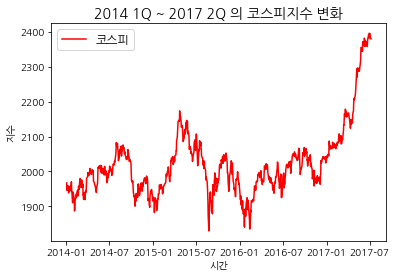

In [17]:
plt.plot(ClearData.날짜, ClearData.코스피, color = 'r', label = "코스피")
plt.title("2014 1Q ~ 2017 2Q 의 코스피지수 변화", fontsize = 14)
plt.ylabel("지수", fontsize = 10)
plt.xlabel("시간", fontsize = 10)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

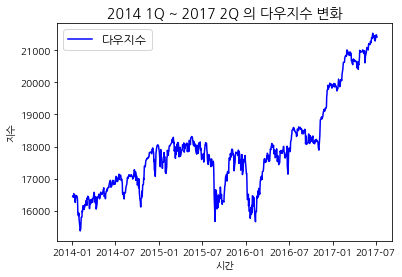

In [18]:
plt.plot(ClearData.날짜, ClearData.다우지수, color = 'b', label = "다우지수")
plt.title("2014 1Q ~ 2017 2Q 의 다우지수 변화", fontsize = 14)
plt.ylabel("지수", fontsize = 10)
plt.xlabel("시간", fontsize = 10)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

위의 두 그래프를 통해 육안으로 코스피와 다우지수의 변동 추이가 비슷한 것을 확인 할 수 있다.  
다음으로 위의 그래프를 보다 자세하게 변등폭을 시각화해 확인해 본다.

### B. 코스피지수와 다우지수의 전일대비 변등폭 차이 분석

In [19]:
# shift 함수를 사용해 행을 옮겨 전일과 변동 퍼센티지를 구한다.
temp = ClearData.copy()
temp["shift_코스피"] = ClearData.코스피.shift(1).fillna(0)
temp["shift_다우지수"] = ClearData.다우지수.shift(1).fillna(0)
ClearData['전일_대비_코스피_P'] = (temp.코스피 - temp.shift_코스피) / temp.shift_코스피 * 100
ClearData['전일_대비_다우지수_P'] = (temp.다우지수 - temp.shift_다우지수) / temp.shift_다우지수 * 100
ClearData.iloc[0,[4,5]] = 0
ClearData

,날짜,코스피,다우지수,원달러,전일_대비_코스피_P,전일_대비_다우지수_P
0,2014-01-02,1967.189941,16441.35,1050.30,0.000000,0.000000
1,2014-01-03,1946.140015,16469.99,1055.00,-1.070051,0.174195
2,2014-01-06,1953.280029,16425.10,1065.01,0.366881,-0.272556
3,2014-01-07,1959.439941,16530.94,1068.50,0.315362,0.644380
4,2014-01-08,1958.959961,16462.74,1065.45,-0.024496,-0.412560
...,...,...,...,...,...,...
856,2017-06-28,2382.560059,21454.61,1141.91,-0.392562,0.675484
857,2017-06-29,2395.659912,21287.03,1144.07,0.549823,-0.781091
858,2017-07-03,2394.479980,21479.27,1149.26,-0.049253,0.903085
859,2017-07-04,2380.520020,21479.27,1149.26,-0.583006,0.000000


In [20]:
# 2014년의 index 확인
rowcount = 0
for data in ClearData.날짜:
    if data.year == 2014 and data.month == 1 and data.day == 2:
        break
    else:        
        rowcount += 1
print(rowcount)
rowcount = 0
for data in ClearData.날짜:
    if data.year == 2014 and data.month == 12 and data.day == 30:
        break
    else:        
        rowcount += 1
print(rowcount)

0
244


C:\Users\benbe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\benbe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


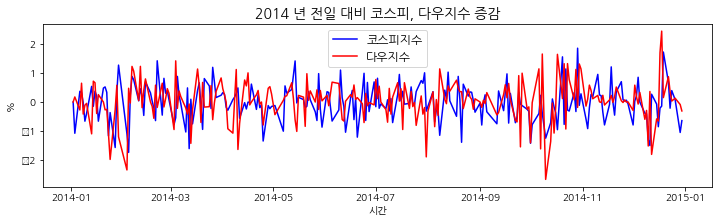

In [21]:
data2014 = ClearData.loc[0:244]
plt.figure(figsize = (12, 3))
plt.plot(data2014.날짜, data2014.전일_대비_코스피_P, color = 'b', label = "코스피지수")
plt.plot(data2014.날짜, data2014.전일_대비_다우지수_P, color = 'r', label = "다우지수")
plt.title("2014 년 전일 대비 코스피, 다우지수 증감", fontsize = 14)
plt.ylabel("%", fontsize = 10)
plt.xlabel("시간", fontsize = 10)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

1번의 단순 지표를 통해 전체적인 지수의 변화가 코스피는 다우지수와 비슷하다는 것을 확인 하였고,  
위의 그래프는 2014년의 코스피, 다우지수의 전일 대비 증감 퍼센트 비교를 통해 보다 자세한 등락을 확인 할 수 있다.  
위의 그래프를 통해서도 코스피와 다우지수는 비슷한 형상으로 증감이 이루어 지고 있음을 확인 할 수 있다.

### C. 코스피지수와 원 달러 환율 분석

코스피 지수가 올라가면 달러환율이 내려가게 되는지를 확인해 본다.

In [22]:
temp = ClearData.copy()
temp["shift_원달러"] = ClearData.원달러.shift(1).fillna(0)
ClearData['전일_대비_원달러_P'] = (temp.원달러 - temp.shift_원달러) / temp.shift_원달러 * 100
ClearData.iloc[0,6] = 0
ClearData

,날짜,코스피,다우지수,원달러,전일_대비_코스피_P,전일_대비_다우지수_P,전일_대비_원달러_P
0,2014-01-02,1967.189941,16441.35,1050.30,0.000000,0.000000,0.000000
1,2014-01-03,1946.140015,16469.99,1055.00,-1.070051,0.174195,0.447491
2,2014-01-06,1953.280029,16425.10,1065.01,0.366881,-0.272556,0.948815
3,2014-01-07,1959.439941,16530.94,1068.50,0.315362,0.644380,0.327696
4,2014-01-08,1958.959961,16462.74,1065.45,-0.024496,-0.412560,-0.285447
...,...,...,...,...,...,...,...
856,2017-06-28,2382.560059,21454.61,1141.91,-0.392562,0.675484,0.363870
857,2017-06-29,2395.659912,21287.03,1144.07,0.549823,-0.781091,0.189157
858,2017-07-03,2394.479980,21479.27,1149.26,-0.049253,0.903085,0.453644
859,2017-07-04,2380.520020,21479.27,1149.26,-0.583006,0.000000,0.000000


In [23]:
# 코스피와 원달러의 전일 대비 증가 하였으면 증, 감소하였으면 감 이외는 x로 표시
list_range = [-100, -0.000001, 0.000001,100]
label = ['감','x', '증']
ClearData['코스피_증감'] = pd.cut(ClearData.전일_대비_코스피_P, list_range, labels = label)
ClearData['원달러_증감'] = pd.cut(ClearData.전일_대비_원달러_P, list_range, labels = label)
ClearData['코스피_원달러'] = None
# 코스피 원달러가 서로 다른 증감을 가지고 있으면 T, 아니면 F 저장.
for i in range(len(ClearData)):
    if ClearData['코스피_증감'][i] == 'x' or ClearData['원달러_증감'][i] == 'x':
        continue
    elif ClearData['코스피_증감'][i] ==  ClearData['원달러_증감'][i]:
        ClearData['코스피_원달러'][i] = 'F'
    else:
        ClearData['코스피_원달러'][i] = 'T'
ClearData

C:\Users\benbe\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\benbe\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,날짜,코스피,다우지수,원달러,전일_대비_코스피_P,전일_대비_다우지수_P,전일_대비_원달러_P,코스피_증감,원달러_증감,코스피_원달러
0,2014-01-02,1967.189941,16441.35,1050.30,0.000000,0.000000,0.000000,x,x,None
1,2014-01-03,1946.140015,16469.99,1055.00,-1.070051,0.174195,0.447491,감,증,T
2,2014-01-06,1953.280029,16425.10,1065.01,0.366881,-0.272556,0.948815,증,증,F
3,2014-01-07,1959.439941,16530.94,1068.50,0.315362,0.644380,0.327696,증,증,F
4,2014-01-08,1958.959961,16462.74,1065.45,-0.024496,-0.412560,-0.285447,감,감,F
...,...,...,...,...,...,...,...,...,...,...
856,2017-06-28,2382.560059,21454.61,1141.91,-0.392562,0.675484,0.363870,감,증,T
857,2017-06-29,2395.659912,21287.03,1144.07,0.549823,-0.781091,0.189157,증,증,F
858,2017-07-03,2394.479980,21479.27,1149.26,-0.049253,0.903085,0.453644,감,증,T
859,2017-07-04,2380.520020,21479.27,1149.26,-0.583006,0.000000,0.000000,감,x,None


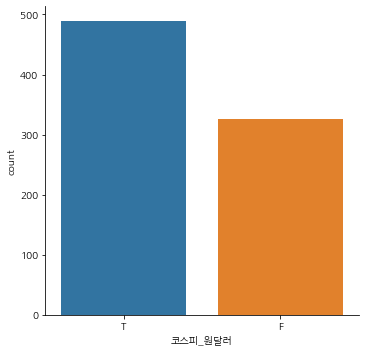

In [24]:
sns.catplot('코스피_원달러', kind = 'count', data = ClearData)

위의 3번째 그래프를 통해 코스피와 원달러의 증감이 다른 T가 상대적으로 많다는 걸 알 수 있다.  
따라서, 원달러 환율이 증가하면 코스피가 떨어지고, 원달러 환율이 감소하면, 코스피가 증가한다.  
즉, 우리나라의 통화인 '원'의 가치가 높아질 경우 코스피가 증가한다.   
이는, 우리나라 의 코스피 특성상 외국인의 투자 비율이 높아 원달러 환율이 낮아지면 외국인 투자 비율이 높아져 코스피가 상승하는 것으로 보여진다,


## 5. 통계 및 머신러닝

## 상관분석

상관분석이란 두 연속형 변수 사이 상관관계가 존재하는지를 파악하고, 상관관계의 정도를 확인하는 것.  
① 산점도(Scatter) 로 두 변수 상관 파악  
② 상관계수 확인  
③ 의사결정  
의 3가지 단계를 통해 상관분석을 하게 된다.  

#### 코스피와 다우지수사이의 상관관계가 존재하는지 파악해본다.  
#### ① 산점도로 두 변수 상관 파악

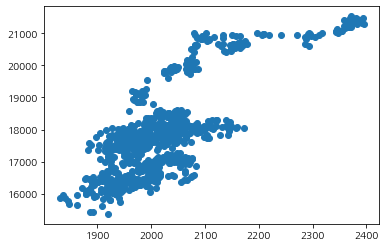

In [25]:
plt.scatter(ClearData.코스피, ClearData.다우지수)

위의 산점도 그래프를 통해 코스피와 다우지수가 우상향 그래프로 어느정도 연관관계가 있음을 확인 할 수있다.  

#### ② 상관계수 확인

In [26]:
corr = ClearData.corr()
corr

,코스피,다우지수,원달러,전일_대비_코스피_P,전일_대비_다우지수_P,전일_대비_원달러_P
코스피,1.000000,0.773708,-0.063166,0.118221,0.008761,-0.003981
다우지수,0.773708,1.000000,0.279502,0.074158,0.072153,-0.002969
원달러,-0.063166,0.279502,1.000000,-0.011103,-0.014995,0.059893
전일_대비_코스피_P,0.118221,0.074158,-0.011103,1.000000,0.220460,-0.225732
전일_대비_다우지수_P,0.008761,0.072153,-0.014995,0.220460,1.000000,-0.173151
전일_대비_원달러_P,-0.003981,-0.002969,0.059893,-0.225732,-0.173151,1.000000


#### ③ 의사결정
위의 표에서 코스피와 다우지수의 상관계수는 0.773708으로 계산되었다.  
이는 강한 양의 상관관계라 할수 있으며 이는 서로 강하게 연관되어있음을 표시한다.

## 회귀분석

앞의 상관분석은 두 연속형 변수에 대한 상관정도만 알 수 있었고, 인과관계는 알 수 없었다.  
따라서, 연속형 변수 X, Y를 독립변수와 종속변후라 하는 인과관계로 설형할 수 있는 회귀분석을 사용해 본다.  


회귀 분석은 다음과 같은 절차로 이루어 진다.  
① 상관분석  
② 변수 정의 (종속 = 독립)  
③ 회귀모형(회귀방정식)  
④ 모델 평가  

#### ① 상관분석

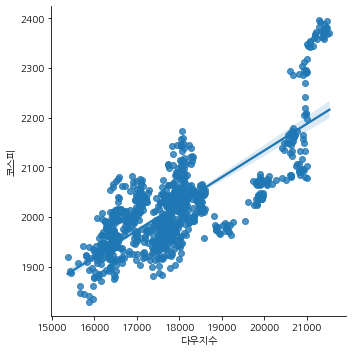

In [27]:
sns.lmplot(x = '다우지수', y = '코스피', data = ClearData)

#### ② 변수 정의 (종속 = 독립)
다우지수가 변함에 따라 코스닥이 어떻게 변하는지에 대해 알아보기 위해  
독립변수(X) = 다우지수  
종속변수(Y) = 코스닥  
로 X, Y를 정하고 다음의 statsmodels.api를 사용하여 단순선형회귀 모형을 만든다.

In [28]:
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("코스피 ~ 다우지수", ClearData).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    코스피   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1281.
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          1.87e-172
Time:                        09:18:19   Log-Likelihood:                -4769.9
No. Observations:                 861   AIC:                             9544.
Df Residuals:                     859   BIC:                             9553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1061.3622     26.916     39.432      0.000    1008.533    1114.191
다우지수           0.0536      0.001     35.793      0.000       0.051       0.057
==============================================================================
Omnibus:                       47.708   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.227
Skew:                           0.601   Prob(JB):                     1.68e-12
Kurtosis:                       3.262   Cond. No.                     2.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ③ 회귀모형(회귀방정식)
위의 statsmodels.api를 통한 summary를 통해 다우지수에 대한 코스닥 지수에 대해 알 수 있다.  
위의 표에서 coef(계수) 부분에 intercept는 1061.3622 이고, 다우지수는 0.0536이다.  
선형 회귀 분석 모델은 Y = aX + b 이므로 이에 대입하면  
``` 코스닥 = (0.0536)다우지수 + 1061.3622``` 가 된다. 

#### ④ 모델 평가
- R-squared(R 제곱) : 위의 회귀분석의 R 제곱은 0.599 입니다. 이는 앞서 계산한 회귀모형이 얼마나 잘 설명해 주는지에 대한 적합성을 의미한다. 즉, 위의 회귀모형의 59.9%의 정확성을 가지고 있다.
- P > |t| (유의확율) : 보통 독립변수가 95%의 신뢰도를 가지고 있어야 유의미하다고 판단하며, 독립변수의 유의 확률이 0.05 보다 적어야 한다. 위의 회귀 모형의 경우 0.000으로 다우지수는 유의미하게 코스닥에 영향을 준다고 판단할 수 있다.
- Durbin-Watson 검정 : DW 검정은 잔차의 독립성을 확인 할 수 있는 수치이다. 0 이면 잔차가 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 사기 상관을 갖는다 해석한다. 위의 회귀모델의 경우 DW 검정값이 0.055로 양의 자기 상관을 가져 결과를 왜곡 시킬 수 있다.
- No.observations : 861개의 순서쌍을 통해 회귀 분석을 실시
- Df Model : 회귀분석의 예측 변수의 숫자로 여기서는 예측 변수가 다우지수 한개 이므로 1이다.


## LSTM
- 위에서 분석하고 만든 회귀모형을 기초로 하여 경험을 통해 자동으로 개선하는 컴퓨터 알고리즘의 연구이다.  
- ```아서 사무엘```은 머신러닝을 기계가 일일이 코드로 명시하지 않은 동작을 데이터로부터 학습하여 실행 하도록 하는 알고리즘을 개발하는 연구분야라 정의했다.
- 대표적인 머신러닝 모델은 CNN(Convolutional neural network)이며 이는 이미지, 영상에 대한 분류, 인식, 검출, 변환등에 자주 사용됩니다.
- 반면 이번 코스피, 다우지수와 같은 시계열 데이터의 경우 RNN(Recurrent Neural Network, 순환신경망) 과 같은 모델을 사용하여 특히 예측 분야에서 사용된다.
- 즉, CNN은 이미지처럼 여러값이 격자 형태로 구성된 입력 데이터를 처리하는 것에 특화된 모델
- RNN은 순차열, 즉, 순서가 있는 일련의 값을 처리하는데 특화되어 있는 모델이다. 
- RNN은 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀 경우 역전파시 학습능력이 주는 문제가 있다.(vanishing gradient problem)이 문제를 해결해 보완한 모델이 LSTM이다.
#### RNN

#### 다우지수와 코스피, 다우지수 전일대비 P 통한 코스피 예측 LSTM 구조

실습할 LSTM의 구조는 위의 그림과 같이 Many to One 구조를 가지며, 입력으로 5일치 이전 코스피, 다우지수, 전일_대비_코스피_P, 전일_대비_다우지수_P를 입력 시 다음날의 코스피 지수를 예측하는 LSTM 모델을 구성한다.

In [29]:
# ClearData df 에서 필요한 열만 추출한다.
temp = ClearData.loc[:,['코스피','다우지수', '전일_대비_코스피_P', '전일_대비_다우지수_P']]
# RNN 학습시 사용할 변수 정의
timesteps = seq_length = 5    # 시퀀스 길이, 즉 한번에 학습할 데이터 길이 5일치
data_dim = 4                  # 입력 데이터 디멘션(코스피, 다우지수, 전일대비 코스피P, 전일대비 다우지수P)
output_dim = 1                # 출력 데이터 디멘션(코스피)
# 각 입력 데이터의 편차가 크므로 MinMaxScaler를 통해 전처리
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

# 학습할 데이터 생성 
input_data = []
for i in range(1,len(temp)):
    input_data.append(temp.iloc[i, [0,1,2,3]].tolist())
input_data = MinMaxScaler(input_data)
output_data = input_data[:,[-4]]

In [30]:
# 학습시킬 데이터 셋으로 변환
dataX = []
dataY = []
for i in range(0, len(output_data) - seq_length):
    x = input_data[i:i + seq_length]
    y = output_data[i+seq_length]
    dataX.append(x)
    dataY.append(y)
# 전체 데이터 셋에서 80% 는 학습데이터로 나머지 20%는 검증데이터로 한다.
train_size = int(len(dataY) * 0.8)
test_size  = len(dataY) - train_size
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
testX  = np.array(dataX[train_size:len(dataX)])
testY  = np.array(dataY[train_size:len(dataY)])

In [31]:
# RNN 모델 생성
hidden_dim   = 10    # 출력에 생성될 히든 디멘션
output_dim   = 1     # 출력을 통한 결과 갯수
learing_rate = 0.01  # 학습 속도
iterations   = 1000   # 학습 횟수
tf.reset_default_graph()  # tensorflow 기본 그래프 초기화
# X None: 배치 사이즈, seq_length: 한번에 트레이닝 할 갯수 data_dim: 한블록에 들어가는 값
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
# 결과 출력값 1
Y = tf.placeholder(tf.float32, [None, 1])
# 모델 생성
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
# 예측값
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)
# 옵티마이저 설정
loss = tf.reduce_mean(tf.square(Y_pred - Y))  # sum of the squares
optm = tf.train.AdamOptimizer(learing_rate)
train = optm.minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 시작
for i in range(iterations):
    _, l = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
# Test 데이터로 검증
testPredict = sess.run(Y_pred, feed_dict={X: testX})


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


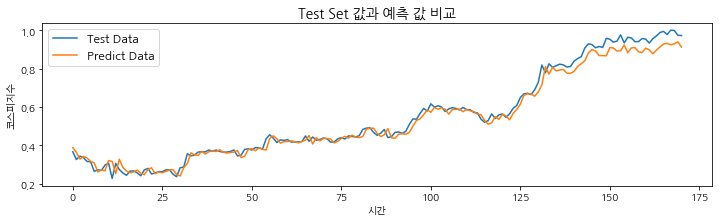

In [32]:
plt.figure(figsize = (12, 3))
plt.plot(testY, label = "Test Data")
plt.plot(testPredict, label = "Predict Data")
plt.title("Test Set 값과 예측 값 비교", fontsize = 14)
plt.ylabel("코스피지수", fontsize = 10)
plt.xlabel("시간", fontsize = 10)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

## 6. 결론 및 차별화 포인트

1. 결론
    1. [데이터 클린징](#3.-데이터-클린징)
        - 총 3개의 분리된 데이터를 통해 Merge(Outer join)후 나온 결과를 통해 결측데이터, 중복데이터, 이상치를 제거하여 정제된 데이터를 만들었다.
    1. [데이터 시각화](#4.-데이터-시각화)
        - 코스피와 다우지수는 서로 연관을 띄고 있는것을 확인 하였다.
        - 코스피와 다우지수의 전일 대비 증감 포인트를 계산하여 비교 결과 증감 또한 비슷한 추이를 가지고 있음을 확인 하였다.
        - 코스피와 원달러 환율을 서로 반비례 관계가 있음을 확인 하였다.
    1. [통계 및 머신러닝](#5.-통계-및-머신러닝)
        - 상관분석: 코스피와, 다우지수는 상관계수 확인을 통해  0.773708가 나왔으며 이는 강한 양의 상관관계로 서로 연관이 있음을 확인하였다.
        - 회귀분석: 상관 분석을 통해 알 수 없는 인과 관계를 알기 위해 회귀 분석을 진행하였다. 독립변수를 다우지수로, 종속변수를 코스닥으로 회귀분석 하였으며, 다우지수를 통해 코스피를 계산하는 회귀 방정식을 만들었다.(``` 코스닥 = (0.0536)다우지수 + 1061.3622```) 이 방정식은 모델 평가부분에서 59.9%의 정확성을 가지고 있음을 확인하였다.
        - LSTM : Tensorflow를 사용하여 시계열 데이터 머신러닝에 자주 사용되는 LSTM을 실제로 사용해 보았다. 이는 시간 상 이전의 값들을 input으로 하고 결과를 output으로 하여 LSTM 모델에 적용해 학습을 시키고 학습한 hidden layer의 가중치를 통해 예측 하는 예측 모델이다. 본 프로젝트에서는 input으로 이전 5일간의 '코스피, 다우지수, 전일 대비 코스피 P, 전일 대비 다우지수 P'를 통해 다음날의 코스피 지수가 어떻게 될 것인가에 대해 알아 보았다. 해당 모델은 test set과 비교 시 비교적 비슷한 결과나 나오는 것을 그래프를 통해 확인 하였다.
    1. 결론
        - 본 프로젝트는 한국의 대표적인 경제 지표인 코스피와 미국의 대표적인 경제 지표인 다우지수를 통해 한국과 미국의 경제 동향을 알아 보았다. 
        - 본 프로젝트를 통해 한국과 미국의 경제 동향은 매우 밀접한 관계가 있음을 확인할 수 있었다.
        - 이는 "한국 주식 수익률과 글로벌 영향요인과의 관계 변화에 관한 연구" 논문의 내용과 일치하며, 미국의 주가가 한국의 경제도에 영향력을 미치고 있음을 확인할 수 있었다.

2. 차별화 포인트
    1. 한가지의 데이터 셋을 활용한 것이 아닌 3가지 데이터 셋을 시계열로 merge후 전처리 하여 사용하였다. 
    1. 간단한 연속형 변수를 통한 그래프 분석 뿐만 아닌 전일 대비 지수 증감열을 추가하여 증감 추이 또한 비교 해 보았다.
    1. 연속형 변수끼리의 상관관계를 알 수 있는 상관 분석과 인과관계를 확인 할 수 있는 회귀분석을 통해 본인이 가정한 "미국의 경제 지표인 다우지수가 한국의 경제지표인 코스닥과의 연관관계가 있다."를 검증 할 수 있었다.
    1. LSTM 이라는 Tensorflow의 시계열 데이터 학습 모델을 사용하여 이전 데이터(코스피, 다우지수, 전일 대비 코스피 P, 전일 대비 다우지수 P)를 통해 다음 날의 코스피 지수를 예측하는 모델을 작성해 보았고, 이 모델이 test set과 비교시 어느정도 일치함을 그래프를 통해 확인 해 보았다. 
    1. "한국 주식 수익률과 글로벌 영향요인과의 관계변화에 관한 연구"의 논문과 결과가 비슷하게 나옴을 확인 할 수있다.

## 7. Reference

### 데이터
Kospi : https://www.kaggle.com/gomjellie/kospi-price-data  
DJI   : https://stooq.com/q/d/?s=%5Edji&c=0&d1=20140101&d2=20170707  
Won/Dollar exchange rate : https://www.kaggle.com/biokpc/us-korean-exchange-rate/data  

### 참고 문헌
- 서지용(2008), 한국 주식 수익률과 글로벌 영향요인과의 관계변화에 관한 연구, 산업경제연구 제21권 제5호  
- 티스토리, 블로그, https://aidalab.tistory.com/m/41  
- 권상기 외 1명(2020), 토닥토닥 파이썬 - 머신러닝,https://wikidocs.net/book/2383  
- 권상기 외 1명(2020), 토닥토닥 파이썬 - 시계열 회귀를 위한 딥 러닝 (텐서플로우 v1), https://wikidocs.net/book/2920 
- Hvass-Labs, TensorFlow-Tutorials, 23_Time-Series Prediction, https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb  
- KDI 한국개발 연구원 경제전망, 2020 상반기, http://www.kdi.re.kr/forecast/forecasts_outlook.jsp  
- 대외경제정책연구원, 미국의 경기변화가 한국 경기에 미치는 영향, http://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE06744420  